# Height-Weight Prediction By Using Linear Regression 

### Abstract
Height and weight prediction has been a popular problem in ergonomics study. 

### Dataset
The dataset is collected from Kaggle website. Here is the link : https://www.kaggle.com/tmcketterick/heights-and-weights

The data contains the variables
- Height (m)
- Weight (kg)

<a id = 'import'></a>
### Importing the Dataset and the required libraries

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Loading Data
data = pd.read_csv('C:\\Users\\chand\\OneDrive\\Documents\\Heights_and_weights_prediction\\Dataset\\data.csv')
df= data.head()
df

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


**columns of the dataset**

In [3]:
data.columns

Index(['Height', 'Weight'], dtype='object')

**Shape of the dataset**

In [4]:
data.shape

(15, 2)

**Is NAN check**

In [5]:
data.isna().any()

Height    False
Weight    False
dtype: bool

**Correlation between the attributes of the dataset**

In [6]:
# Correlation 
data.corr()

,Height,Weight
Height,1.000000,0.994584
Weight,0.994584,1.000000


**values for independent variable and dependent variable in  1 & 2 dimension array**

In [7]:
height = data.Height.values[:,np.newaxis]
weight =data.Weight.values


In [8]:
height


array([[1.47],
       [1.5 ],
       [1.52],
       [1.55],
       [1.57],
       [1.6 ],
       [1.63],
       [1.65],
       [1.68],
       [1.7 ],
       [1.73],
       [1.75],
       [1.78],
       [1.8 ],
       [1.83]])

In [9]:
weight

array([52.21, 53.12, 54.48, 55.84, 57.2 , 58.57, 59.93, 61.29, 63.11,
       64.47, 66.28, 68.1 , 69.92, 72.19, 74.46])

**MIN-MAX Scaling**

**Formula:-** Xnormal=(X-Xmin)/(Xmax-Xmin), where X is the values, Xman is the maximum value of the X and Xmin is the minimum value of this X.

In [10]:
Heightmin=height.min()
print('Heightmin', Heightmin)
Heightmax=height.max() 
print('Heightmax', Heightmax)
Heightnorm=(height-Heightmin)/(Heightmax-Heightmin)
print('Heightnorm', Heightnorm)
Weightmin=weight.min()
print('Weightmin', Weightmin)
Weightmax=weight.max()
print('Weightmax', Weightmax)
Weightnorm=(weight-Weightmin)/(Weightmax-Weightmin)
print('Weightnorm', Weightnorm)

Heightmin 1.47
Heightmax 1.83
Heightnorm [[0.        ]
 [0.08333333]
 [0.13888889]
 [0.22222222]
 [0.27777778]
 [0.36111111]
 [0.44444444]
 [0.5       ]
 [0.58333333]
 [0.63888889]
 [0.72222222]
 [0.77777778]
 [0.86111111]
 [0.91666667]
 [1.        ]]
Weightmin 52.21
Weightmax 74.46
Weightnorm [0.         0.04089888 0.10202247 0.16314607 0.22426966 0.2858427
 0.34696629 0.40808989 0.48988764 0.55101124 0.63235955 0.7141573
 0.79595506 0.89797753 1.        ]


**Linear Regression**

Linear Regression is a machine learning algorithm based on supervised learning. Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x). So, this regression technique finds out a linear relationship between x (input) and y(output).


In [11]:
import sklearn.linear_model as lm 
lr=lm.LinearRegression() 
lr.fit(height,weight)


LinearRegression()

In [12]:
print(f'Coefficient: {lr.coef_}')
print(f'Intercept: {lr.intercept_}')

Coefficient: [61.27218654]
Intercept: -39.061955918843935


**Predict weight based on Height**

In [13]:
knownvalue=float(input("Enter the value of height:"))
findvalue=lr.predict([[knownvalue]])
print("when the height value is",knownvalue,"that moment weight value is",findvalue)

Enter the value of height:1.5
when the height value is 1.5 that moment weight value is [52.84632389]


**Insert predicted value into dataset**

In [14]:
data["predicted_value"]=lr.predict(height)
data.head()

,Height,Weight,predicted_value
0,1.47,52.21,51.008158
1,1.50,53.12,52.846324
2,1.52,54.48,54.071768
3,1.55,55.84,55.909933
4,1.57,57.20,57.135377


**Model accuracy using R2_Score**

In [15]:
from sklearn.metrics import r2_score
accuracy=r2_score(weight,lr.predict(height))
print("The model accuracy is",accuracy*100,"%")

The model accuracy is 98.91969224457968 %


<a id = '1'></a>
### Plotting the Data Distribution

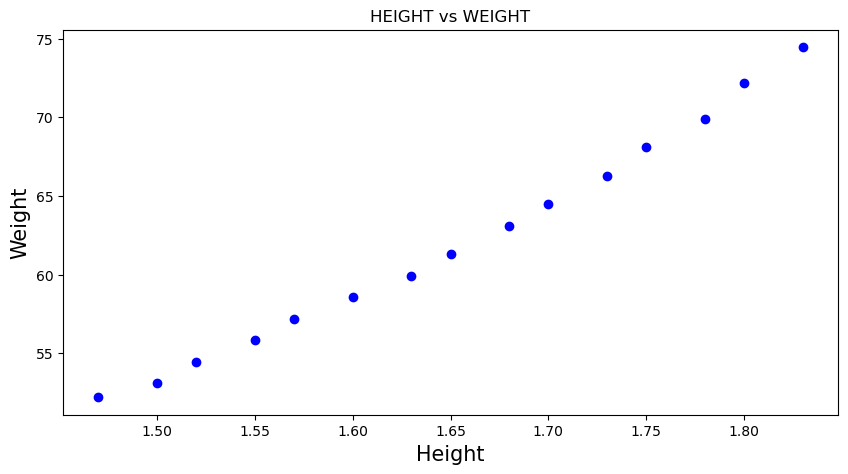

In [16]:
# Plotting data distribution
plt.figure(figsize=(10,5))
plt.title('HEIGHT vs WEIGHT')
plt.xlabel('Height', fontsize=15)
plt.ylabel('Weight', fontsize=15)
plt.scatter( data.Height, data.Weight, color='blue')
plt.show()